In [2]:
# google drive에서 data 가져오기

import os
import pandas as pd

os.listdir('./drive/MyDrive/machine learning/data')

['kaggle_survey_2020_responses.csv',
 'friend.csv',
 'new_friend.csv',
 'ventura.csv',
 'abalone.data',
 'new_friend_index_true.csv',
 'test.csv',
 'train.csv',
 'data-01-test-score.csv',
 'data-03-diabetes.csv',
 'data-04-zoo.csv']

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = './drive/MyDrive/machine learning/data/kaggle_survey_2020_responses.csv'
df = pd.read_csv(file_path,encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

In [4]:
# 라이브러리 사용
import numpy as np # => linear algebra
import pandas as pd # => data processing
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-pastel")

In [5]:
# 데이터를 받아오면 데이터의 쉐잎부터 파악
raw = pd.read_csv(file_path, low_memory=False)
raw.shape

(20037, 355)

In [ ]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [6]:
# iloc는 인덱스(숫자), LOC는 인덱스의 값으로(인덱스가 a,b,c일 수도 있음)
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [7]:
answer = raw.drop([0]) # 0번째 행을 버림
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [ ]:
# 데이터의 정보를 제공
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


# **Q1 What is your age?**

In [ ]:
question['Q1']

'What is your age (# years)?'

In [ ]:
type(answer['Q1'].value_counts().sort_index())

pandas.core.series.Series

In [8]:
answer['Q1'].value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

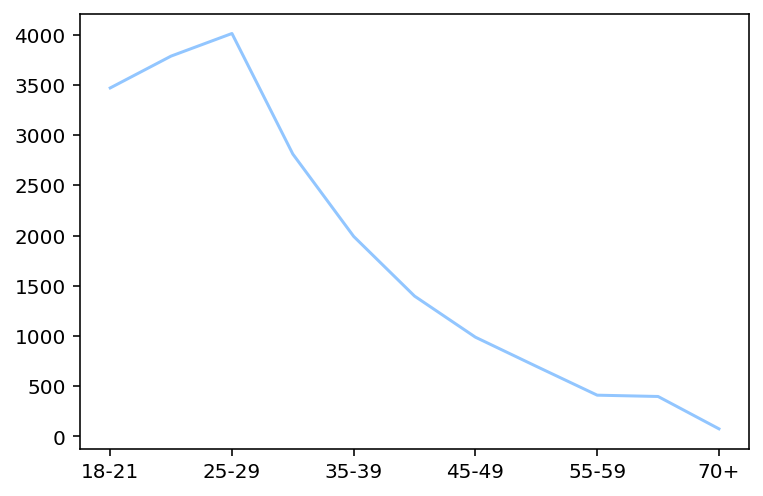

In [ ]:
answer['Q1'].value_counts().sort_index().plot()
plt.show()

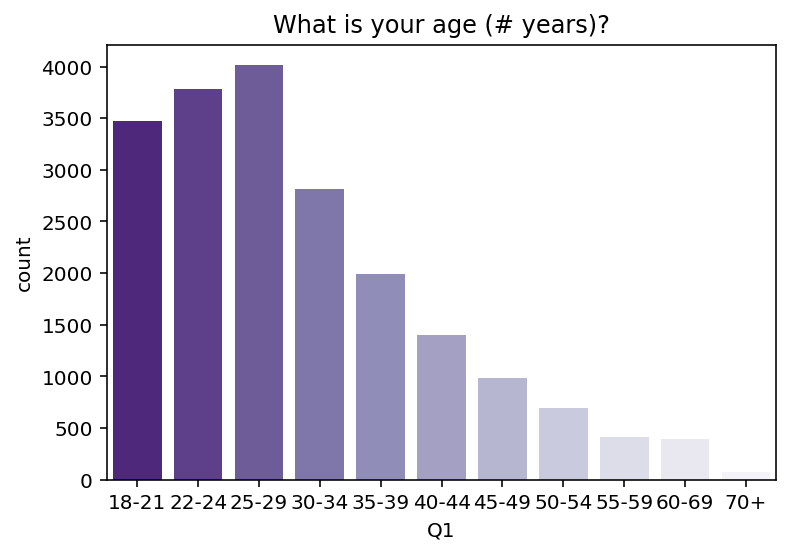

In [ ]:
sns.countplot(data=answer.sort_values('Q1'), x='Q1', palette='Purples_r').set_title(question['Q1'])
plt.show()

### Q2 What is your gender? - Selected Choice

In [ ]:
question['Q2']

'What is your gender? - Selected Choice'

In [ ]:
answer['Q2']

1          Man
2          Man
3          Man
4          Man
5          Man
         ...  
20032      Man
20033    Woman
20034      Man
20035      Man
20036      Man
Name: Q2, Length: 20036, dtype: object

In [ ]:
answer['Q2'].value_counts(normalize=True)*100

Man                        78.803154
Woman                      19.355161
Prefer not to say           1.312637
Prefer to self-describe     0.269515
Nonbinary                   0.259533
Name: Q2, dtype: float64

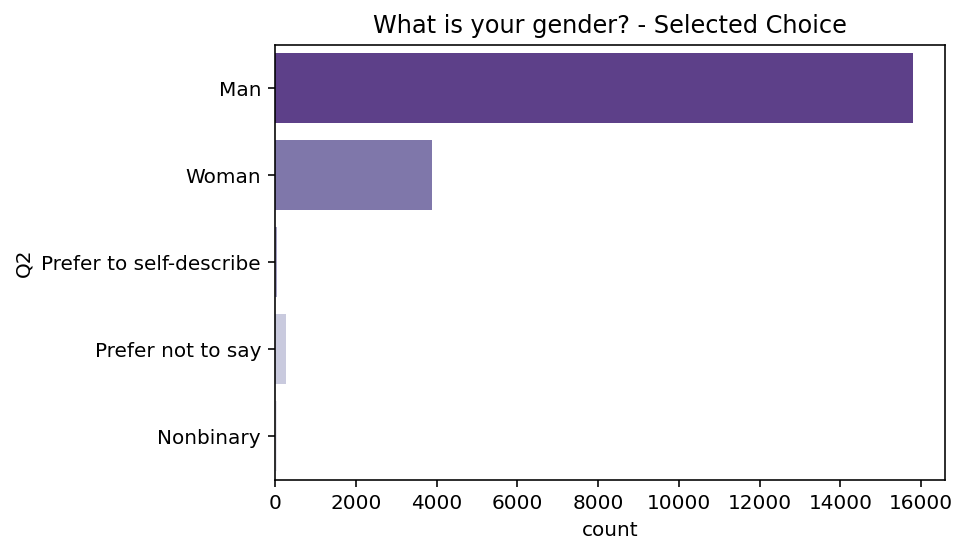

In [ ]:
sns.countplot(data=answer, y='Q2', palette='Purples_r').set_title(question['Q2'])
plt.show()

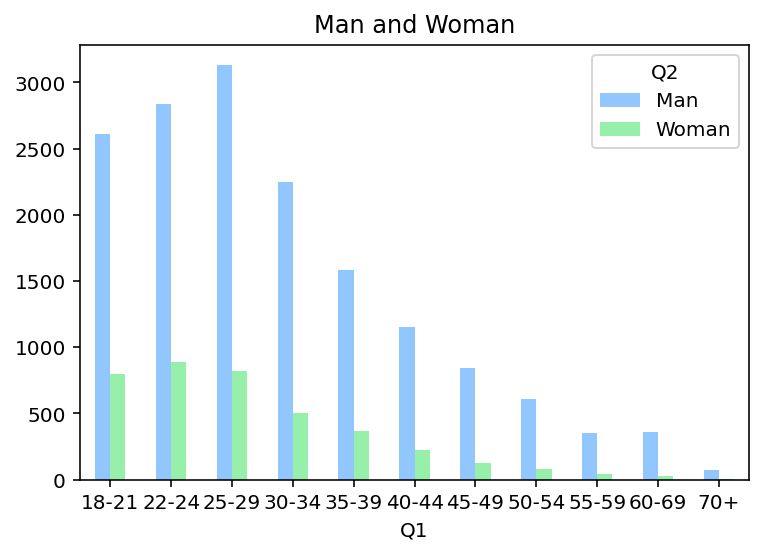

In [ ]:
q1q2 = pd.crosstab(answer['Q1'],answer['Q2'])
q1q2[["Man","Woman"]].plot.bar(rot=0).set_title("Man and Woman")
plt.show()

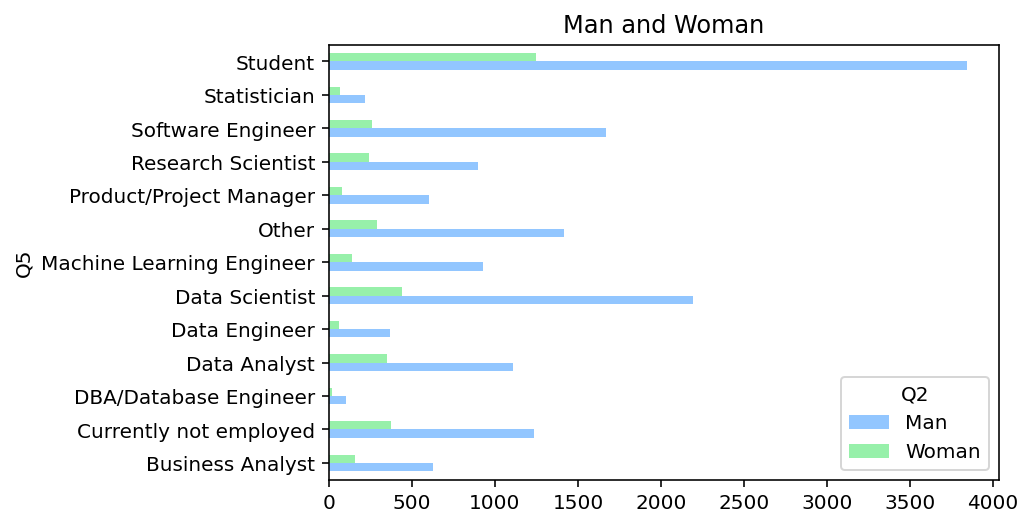

In [ ]:
q2q5 = pd.crosstab(answer['Q5'],answer['Q2'])
q2q5[["Man","Woman"]].plot.barh(rot=0).set_title("Man and Woman")
plt.show()

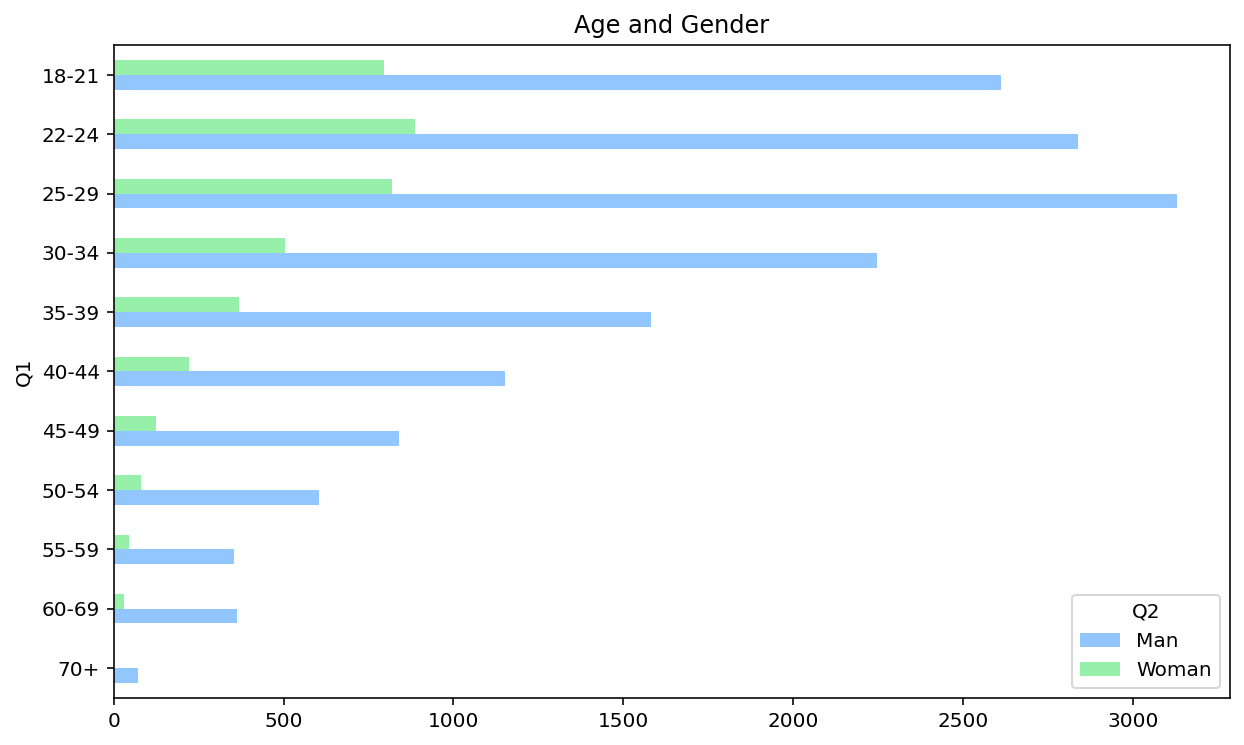

In [ ]:
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6), title="Age and Gender")
plt.show()

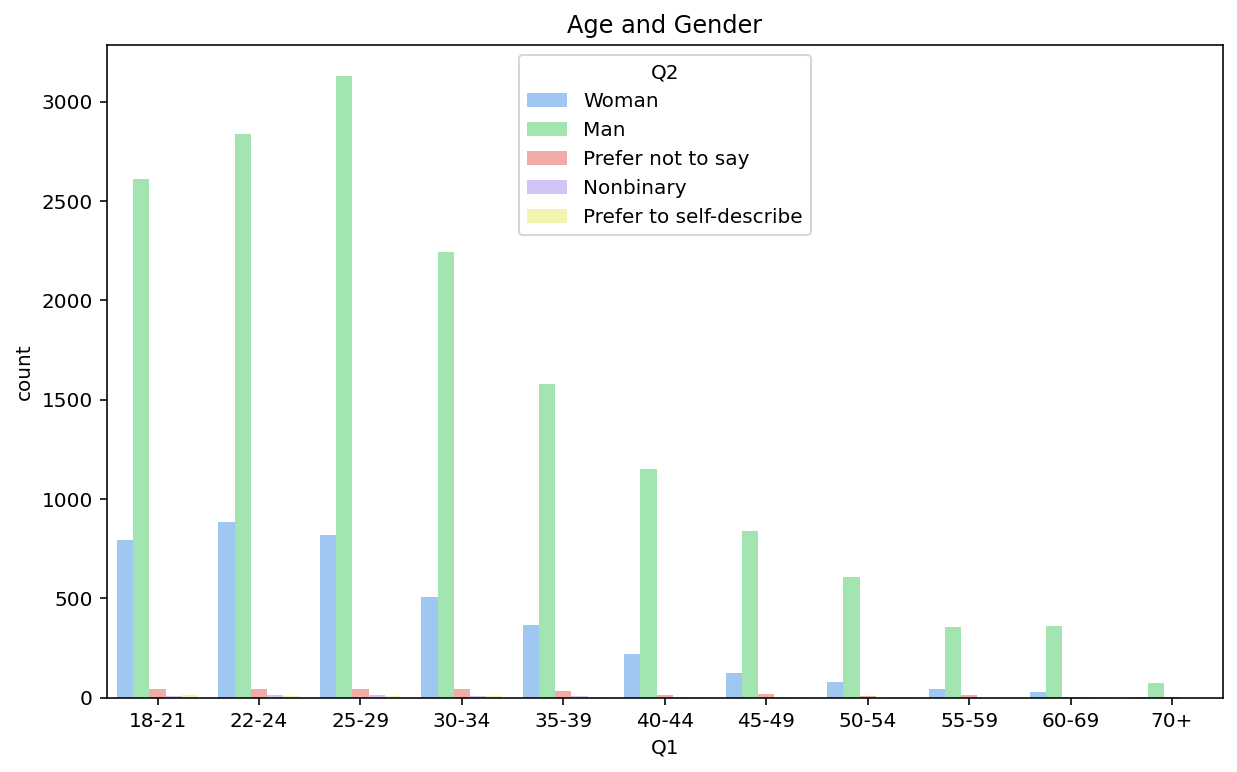

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=answer.sort_values('Q1'), x="Q1", hue='Q2').set_title("Age and Gender")
plt.show()

### 함수로 만들기

In [ ]:
def show_count_plot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order= answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer,
                y=qno,
                order=order,
                palette="Greens_r").set_title(question[qno])

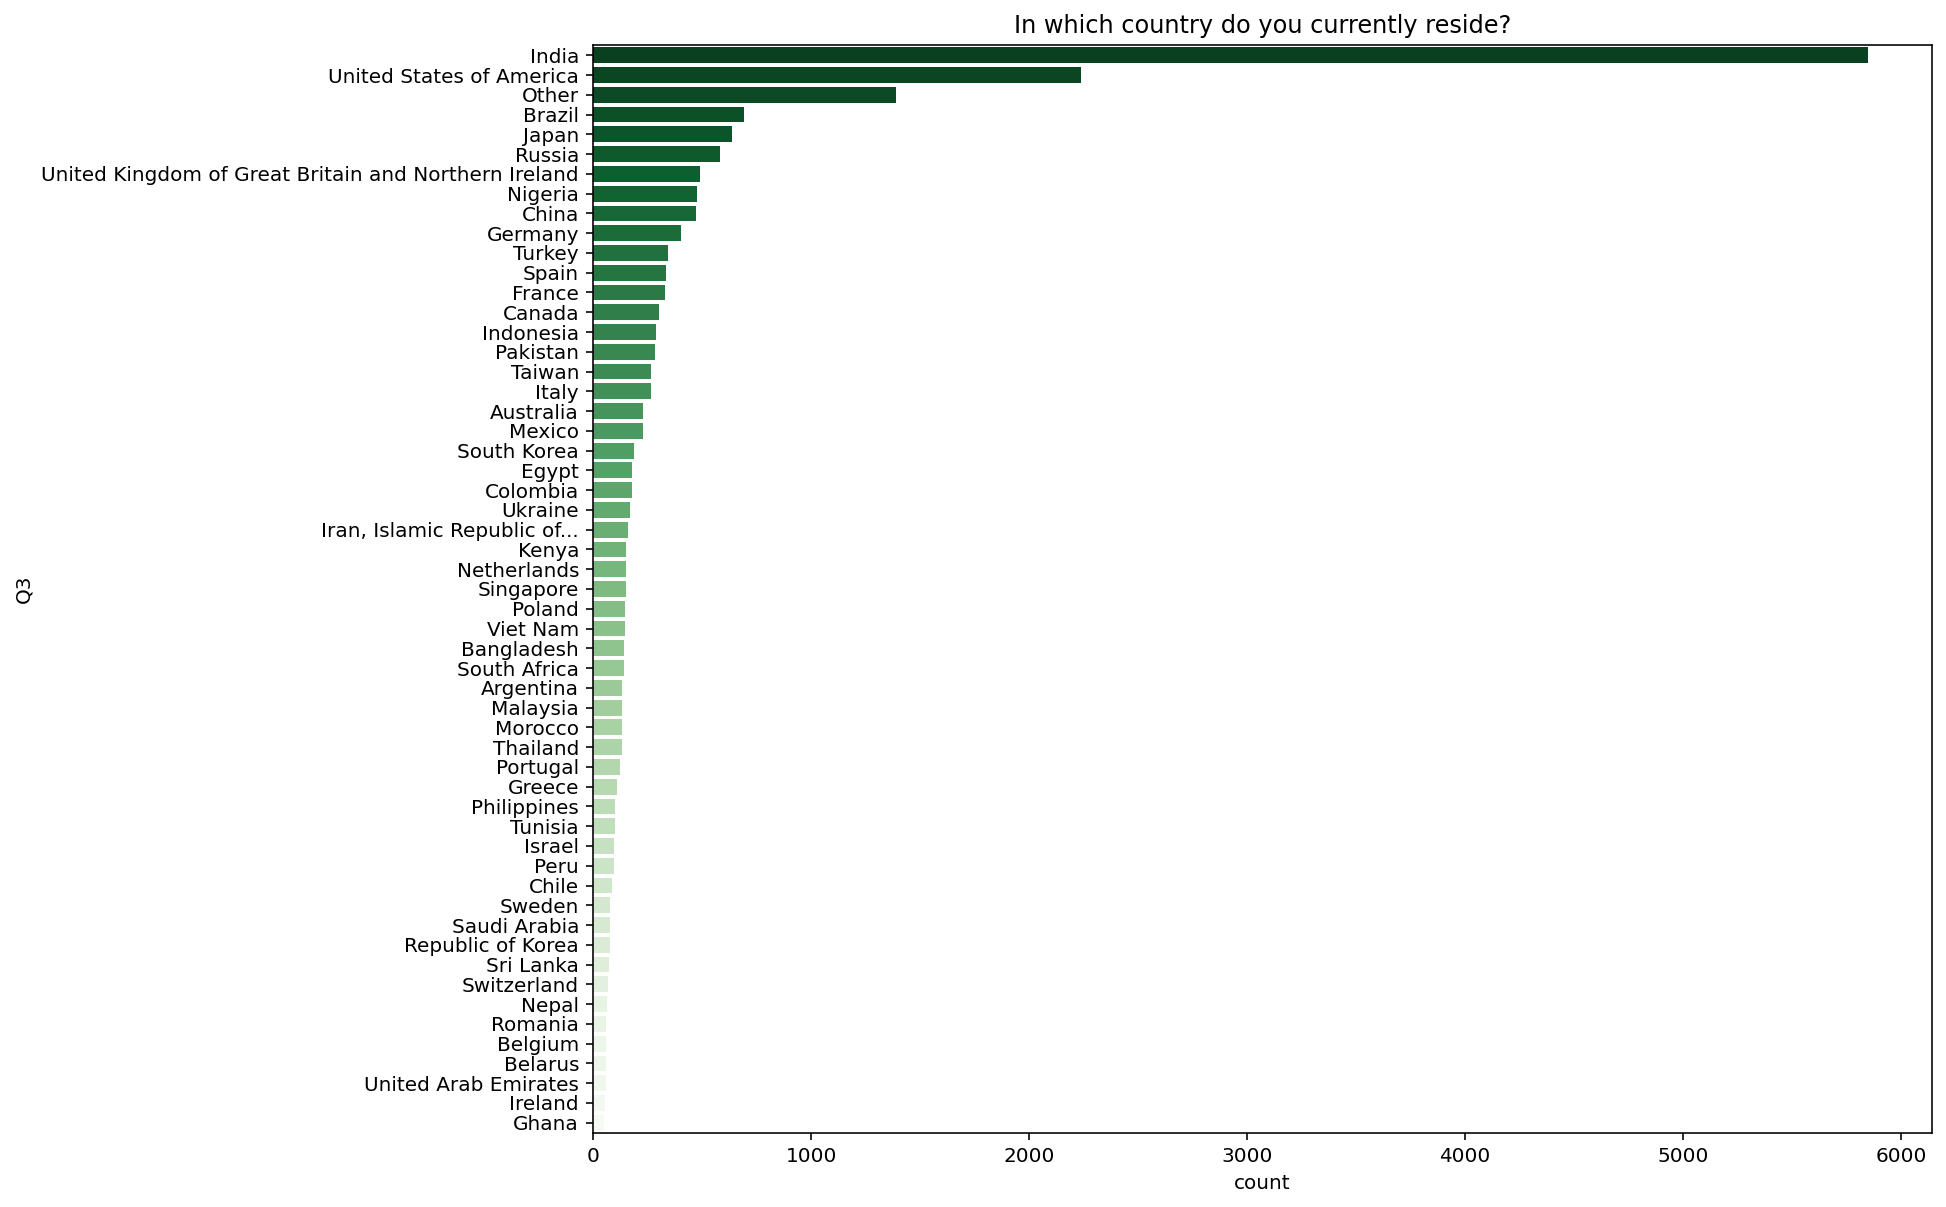

In [ ]:
show_count_plot_by_qno('Q3', (12,10))

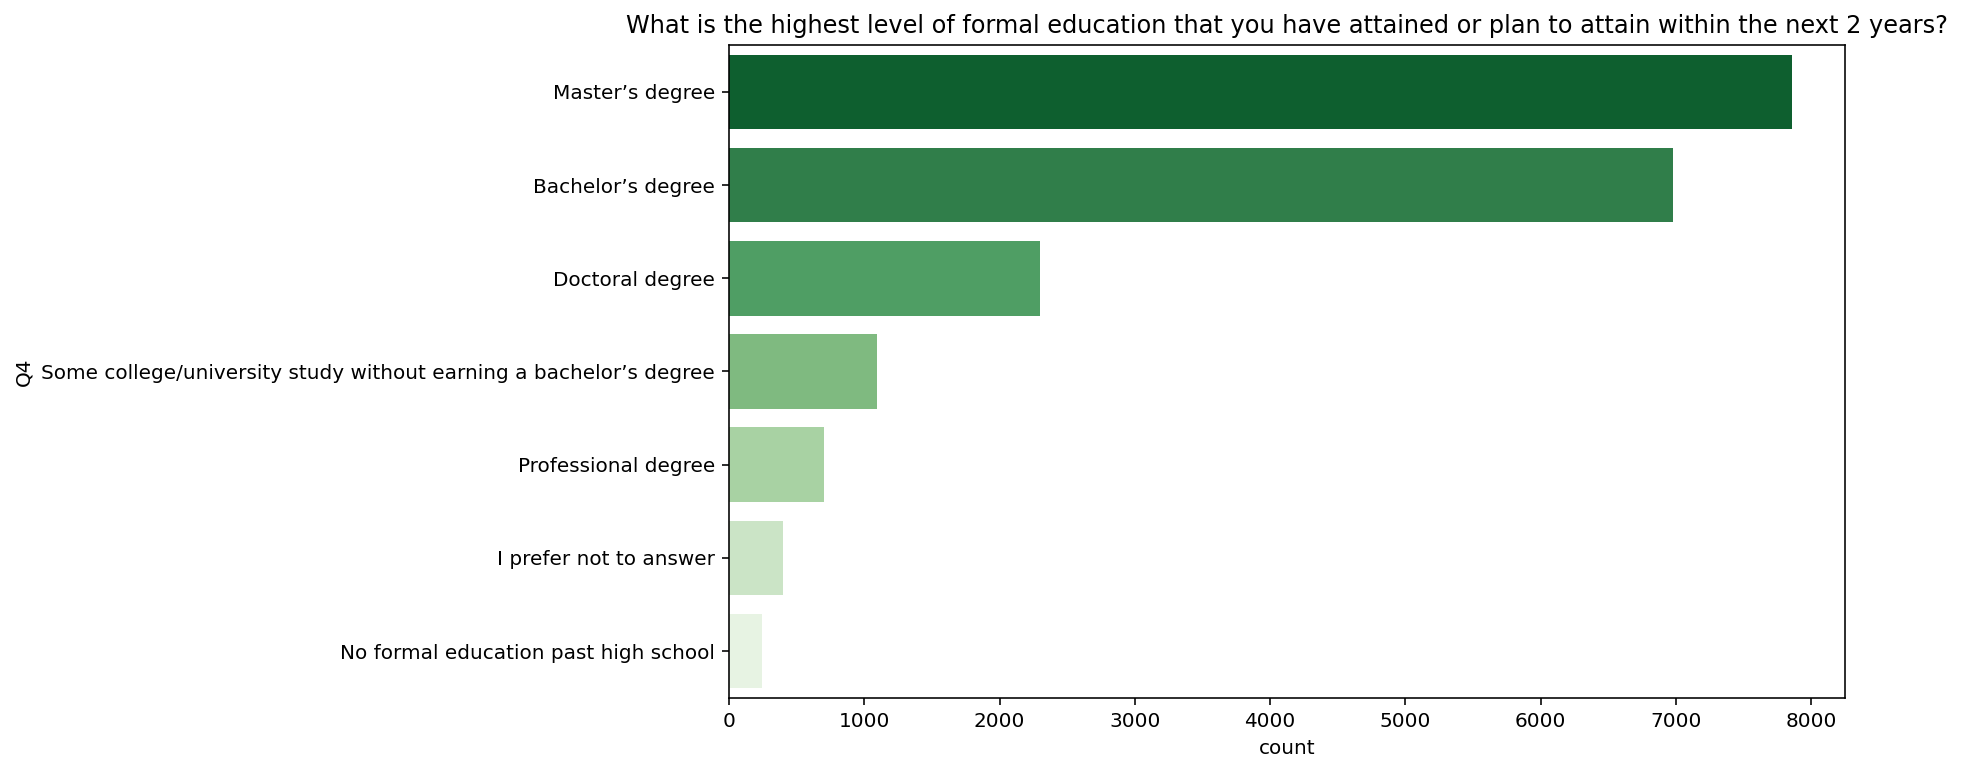

In [ ]:
show_count_plot_by_qno("Q4")

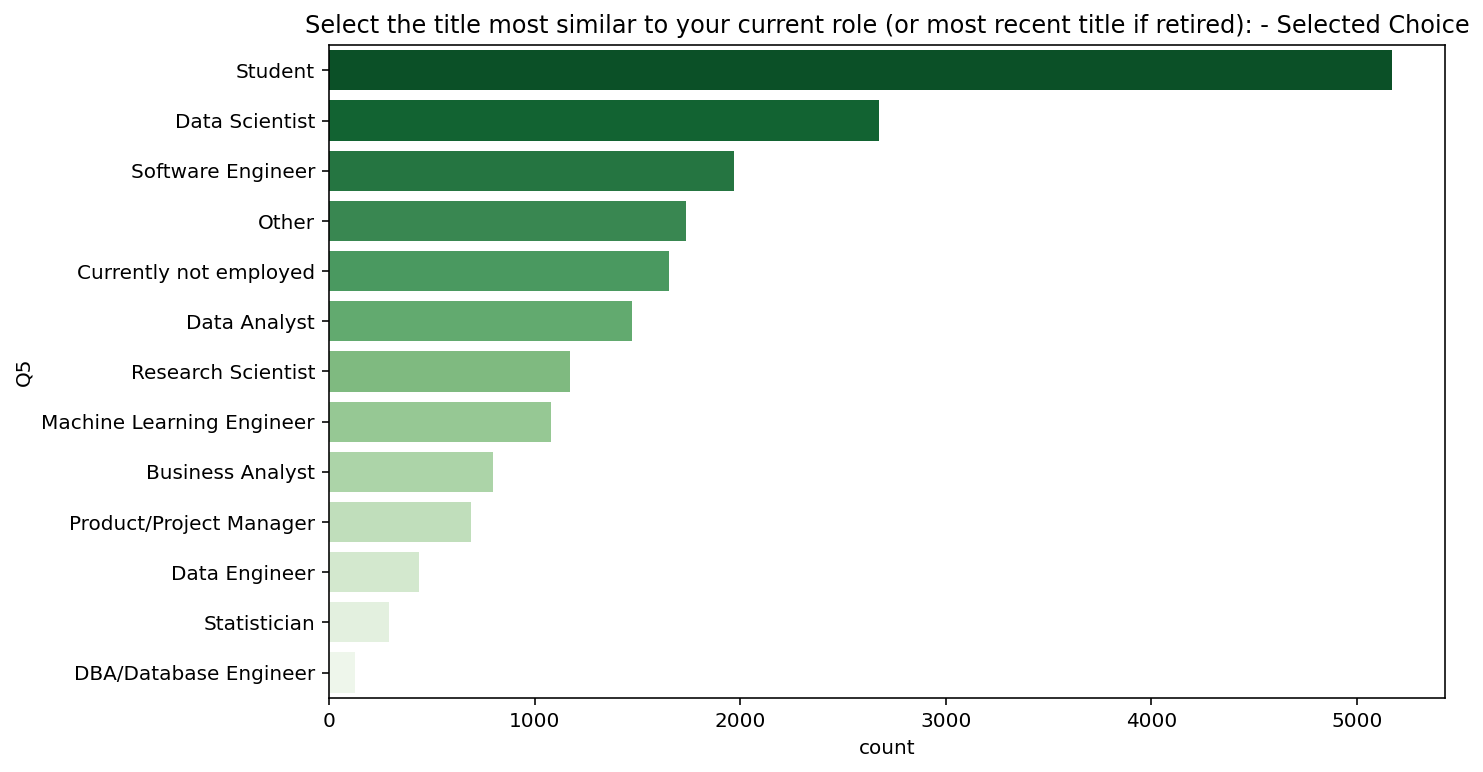

In [ ]:
show_count_plot_by_qno("Q5")

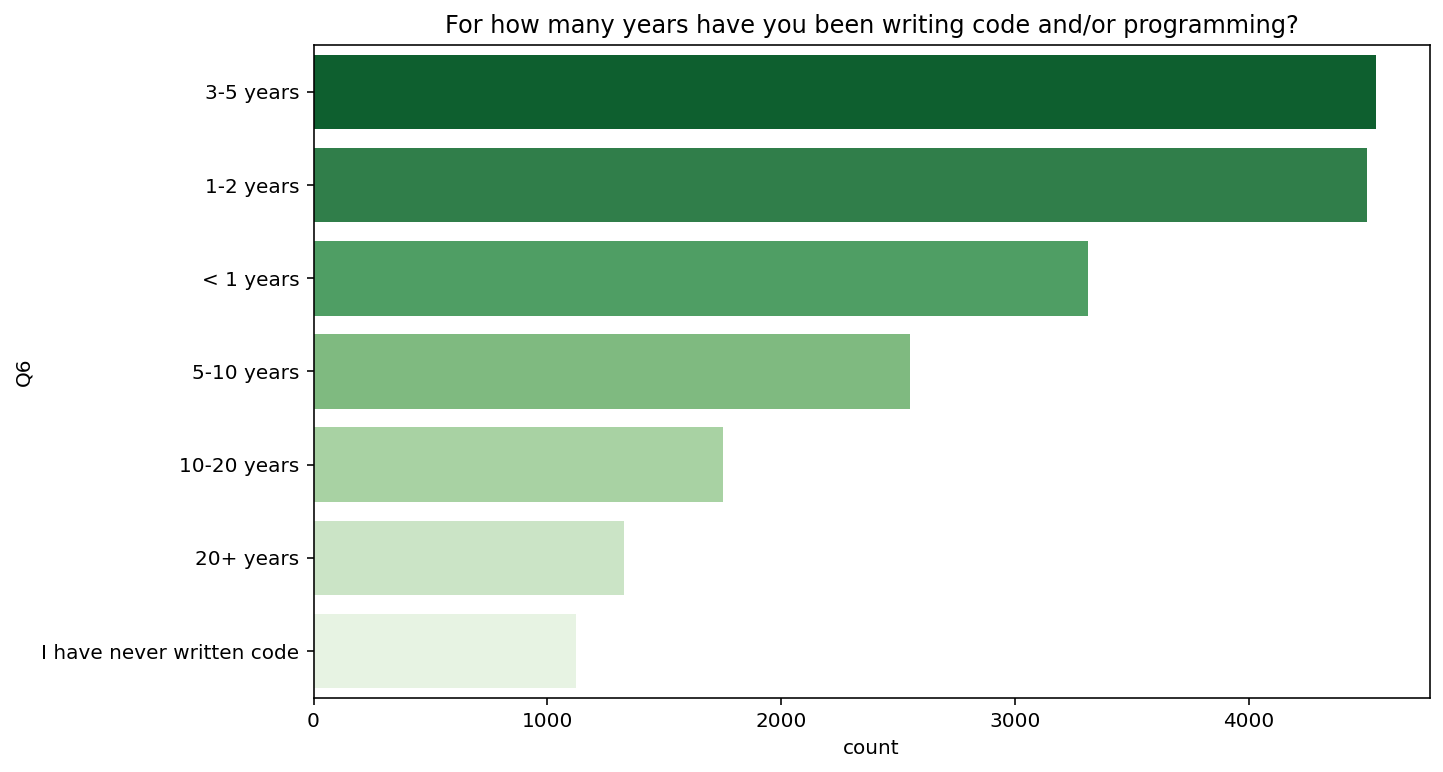

In [ ]:
show_count_plot_by_qno("Q6")

In [ ]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years',  
       '10-20 years', '20+ years']

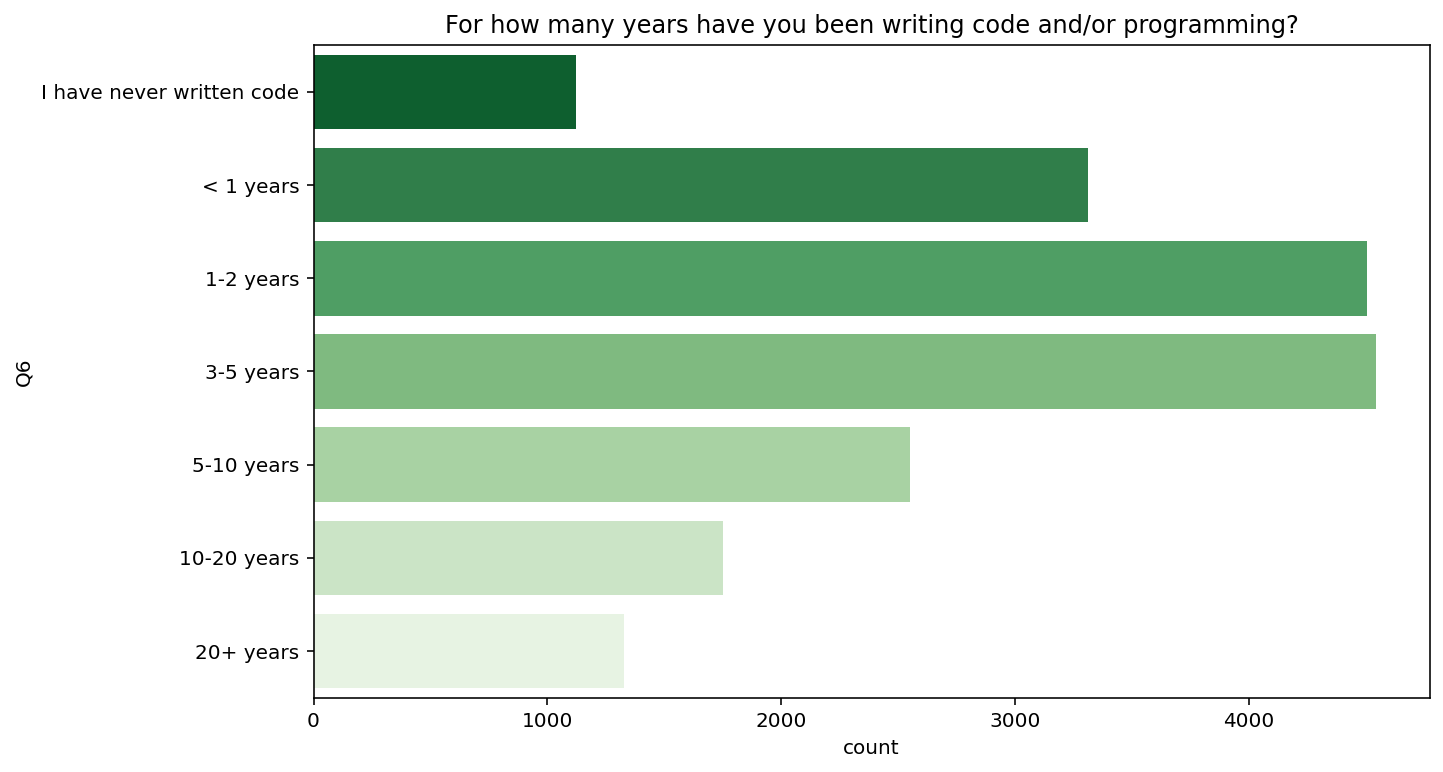

In [ ]:
show_count_plot_by_qno("Q6", order=q6_cols)

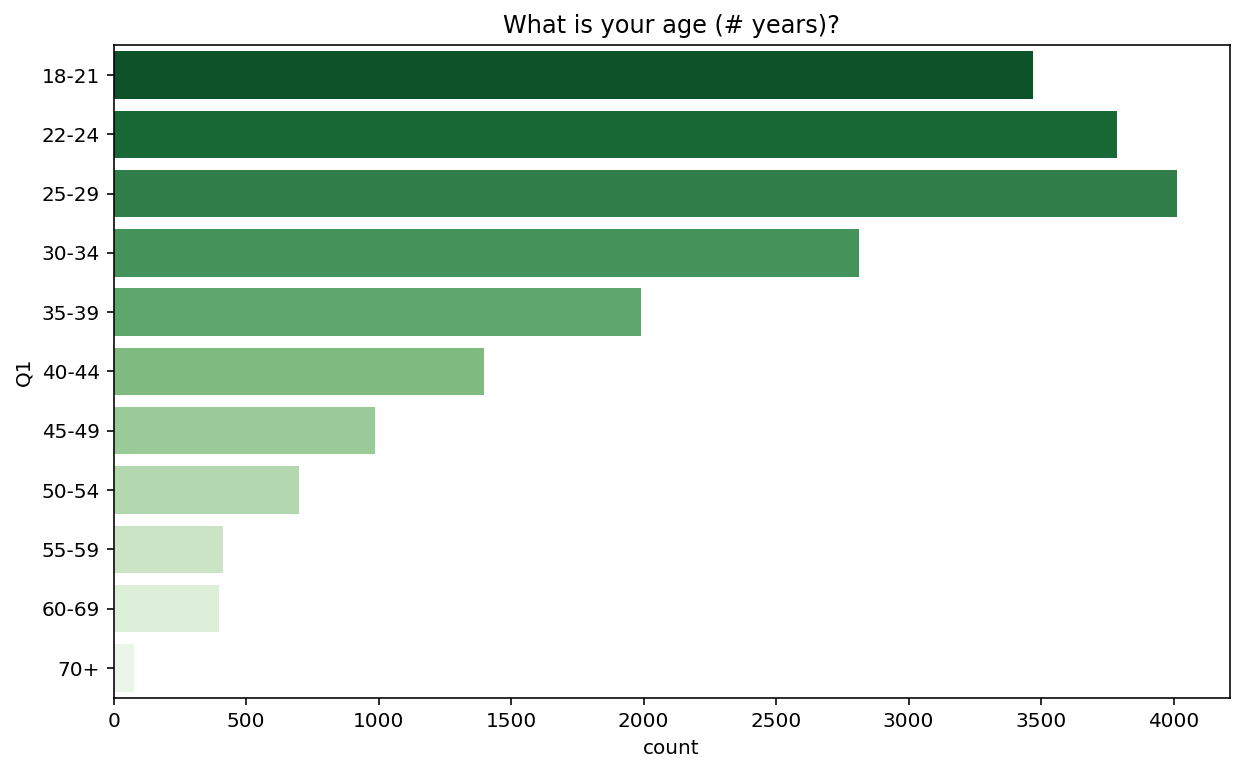

In [ ]:
q1_cols = answer['Q1'].value_counts().sort_index().index.to_list()
show_count_plot_by_qno("Q1", order=q1_cols)

### Filter & Describe

In [ ]:
# filter를 이용해서 원하는 데이터를 뽑아내기
question.filter(regex='Q7')[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [ ]:
answer.filter(regex='Q7')['Q7_Part_1'].value_counts()

Python    15530
Name: Q7_Part_1, dtype: int64

In [ ]:
answer_Q7 = answer.filter(regex='Q7')

In [ ]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [ ]:
# 행의 값을 가져오고 싶기 때문에 iloc 또는 loc 사용
# 두 개 이상의 값을 사용하려면 리스트 형태로 만들어야 함
# 전치행렬을 만드는 이유는 set_index를 하려면 column에 값이 존재해야 함
answer_Q7_count = answer_Q7_desc.loc[['top','count']].T
answer_Q7_count

,top,count
Q7_Part_1,Python,15530
Q7_Part_2,R,4277
Q7_Part_3,SQL,7535
Q7_Part_4,C,3315
Q7_Part_5,C++,3827
Q7_Part_6,Java,3367
Q7_Part_7,Javascript,2995
Q7_Part_8,Julia,262
Q7_Part_9,Swift,198
Q7_Part_10,Bash,1776


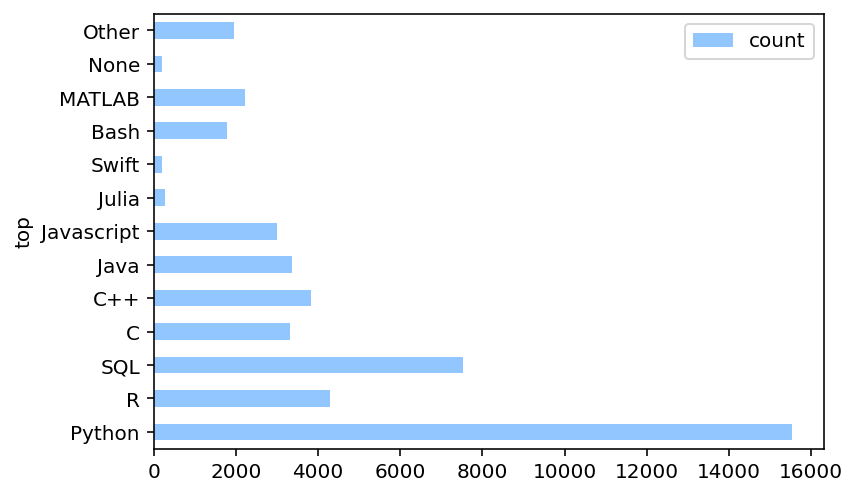

In [ ]:
answer_Q7_count = answer_Q7_count.set_index("top")

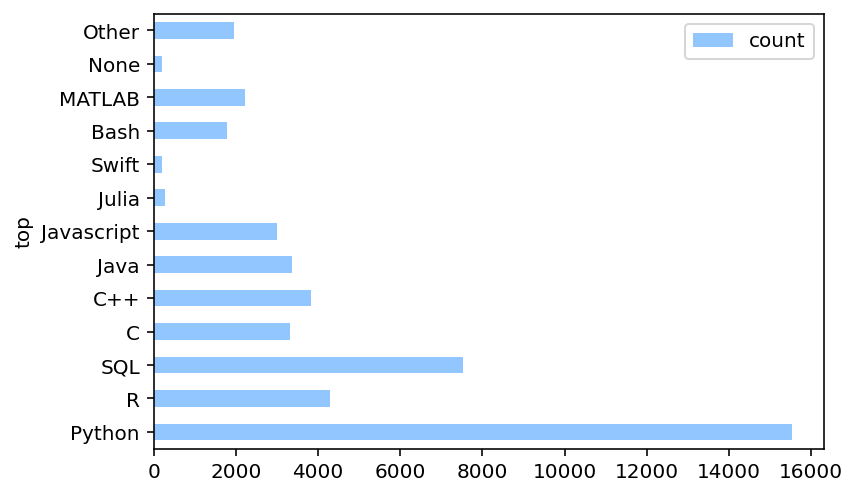

In [ ]:
answer_Q7_count.plot.barh()
plt.show()

In [ ]:
# Barplot을 통해서 막대 그래프로 그림
answer_Q7_count = answer_Q7_count.sort_values("count",ascending=True)
answer_Q7_count

,count
top,
Swift,198
None,206
Julia,262
Bash,1776
Other,1945
MATLAB,2217
Javascript,2995
C,3315
Java,3367


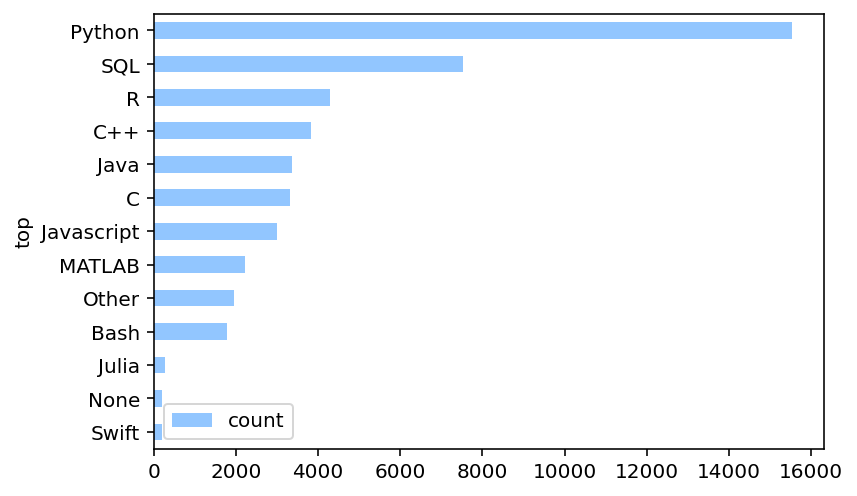

In [ ]:
answer_Q7_count.plot.barh()
plt.show()

In [ ]:
q7_title = question.filter(regex='Q7')[0].split('-')[0]

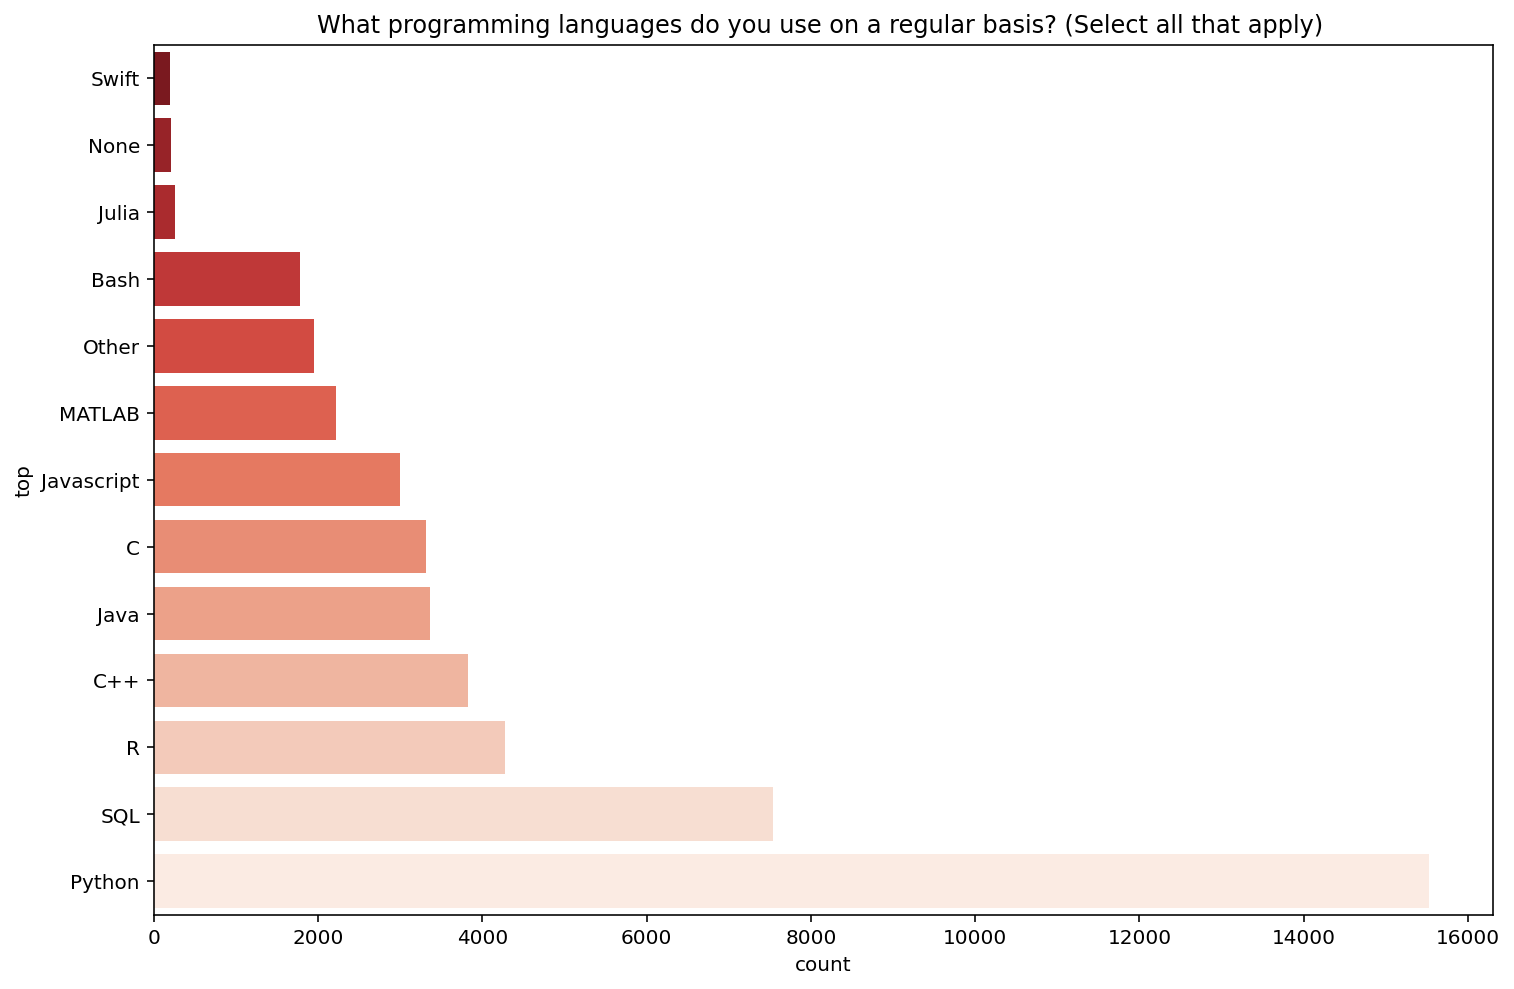

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=answer_Q7_count,
            y=answer_Q7_count.index,x="count", palette="Reds_r").set_title(q7_title)
plt.show()


In [ ]:
q8_title = question.filter(regex='Q8')[0].split('-')[0]
q8_title

'What programming language would you recommend an aspiring data scientist to learn first? '

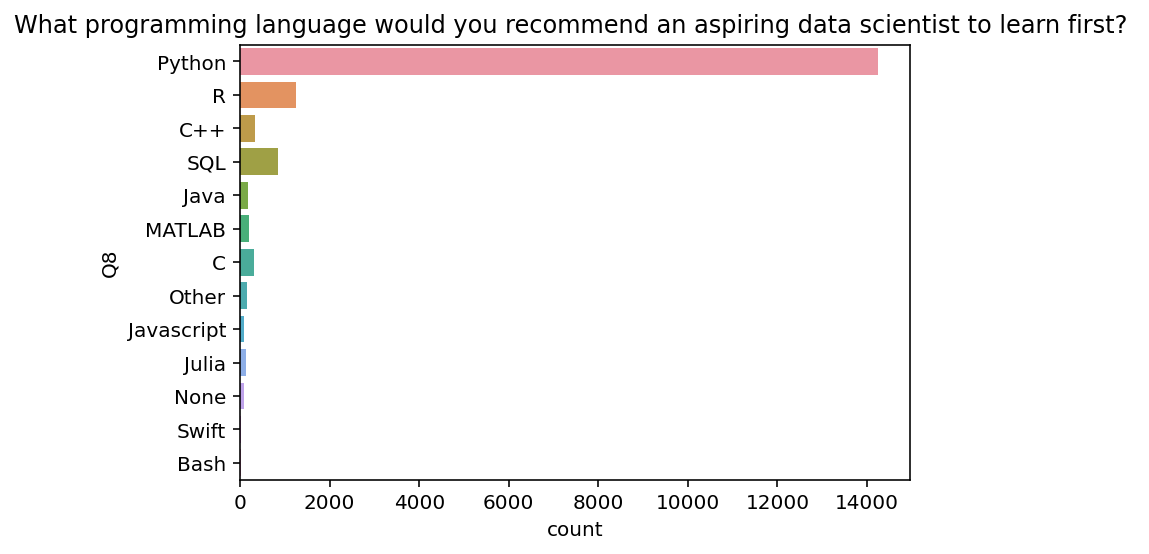

In [ ]:
answer_Q8 = answer.filter(regex='Q8')
sns.countplot(data=answer_Q8, y='Q8').set_title(q8_title)
plt.show()

In [ ]:
question.filter(regex='Q8')

Q8    What programming language would you recommend ...
Name: 0, dtype: object

### Multiple choice에 대한 함수 생성

In [ ]:
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split('-')[0]
    return q_no

def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[['top','count']].T.set_index('top')
  answer_count = answer_count.sort_values('count',ascending=False)
  return answer_count

def show_multiple_choice_bar_plot_by_qno(qno):
  answer = get_multiple_choice_answer_by_qno(qno)
  sns.barplot(data=answer, y=answer.index, x='count', palette='Greens_r').set_title(get_question_title_by_qno(qno))
  plt.show()


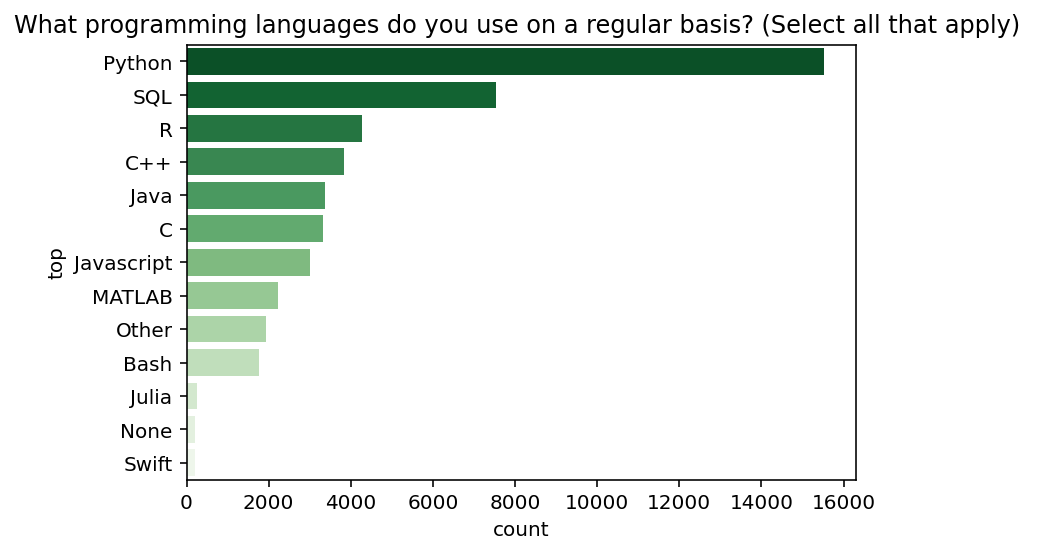

In [ ]:
show_multiple_choice_bar_plot_by_qno('Q7')

In [ ]:
# multiple choice에서 crosstab과 유사한 방법 사용
# groupby 이용

q7_cols = answer.filter(regex='Q7')
q7_cols.describe().loc['top'].tolist()

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [ ]:
q2q7 = answer.filter(regex='Q7|Q2$')
q2q7_count = q2q7.groupby('Q2').count()
q2q7_count.colmuns = q7_cols
q2q7_count.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

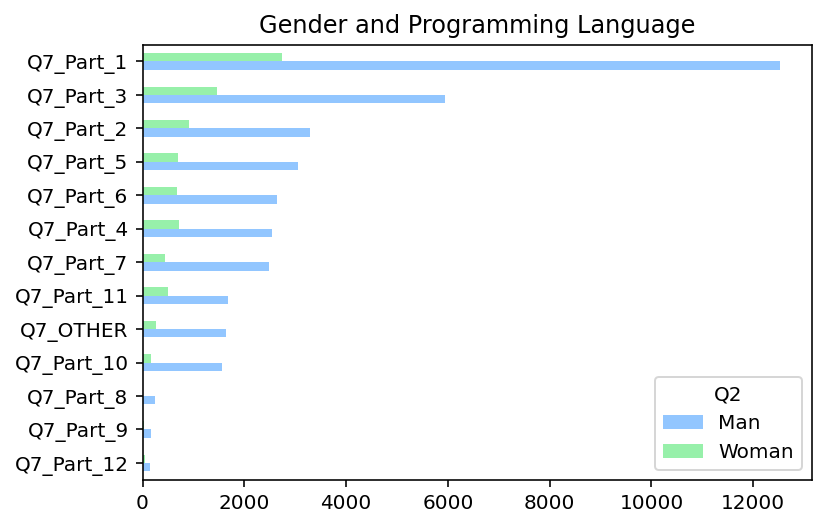

In [ ]:
q2q7_count.loc[['Man','Woman']].T.sort_values('Man').plot.barh(title='Gender and Programming Language')
plt.show()

In [ ]:
def show_plot_by_qno(qno, fsize=(12,8), order=None):
  if qno in question.index:
    show_count_plot_by_qno(qno, fsize, order)
  else:
    show_multiple_choice_bar_plot_by_qno(qno)


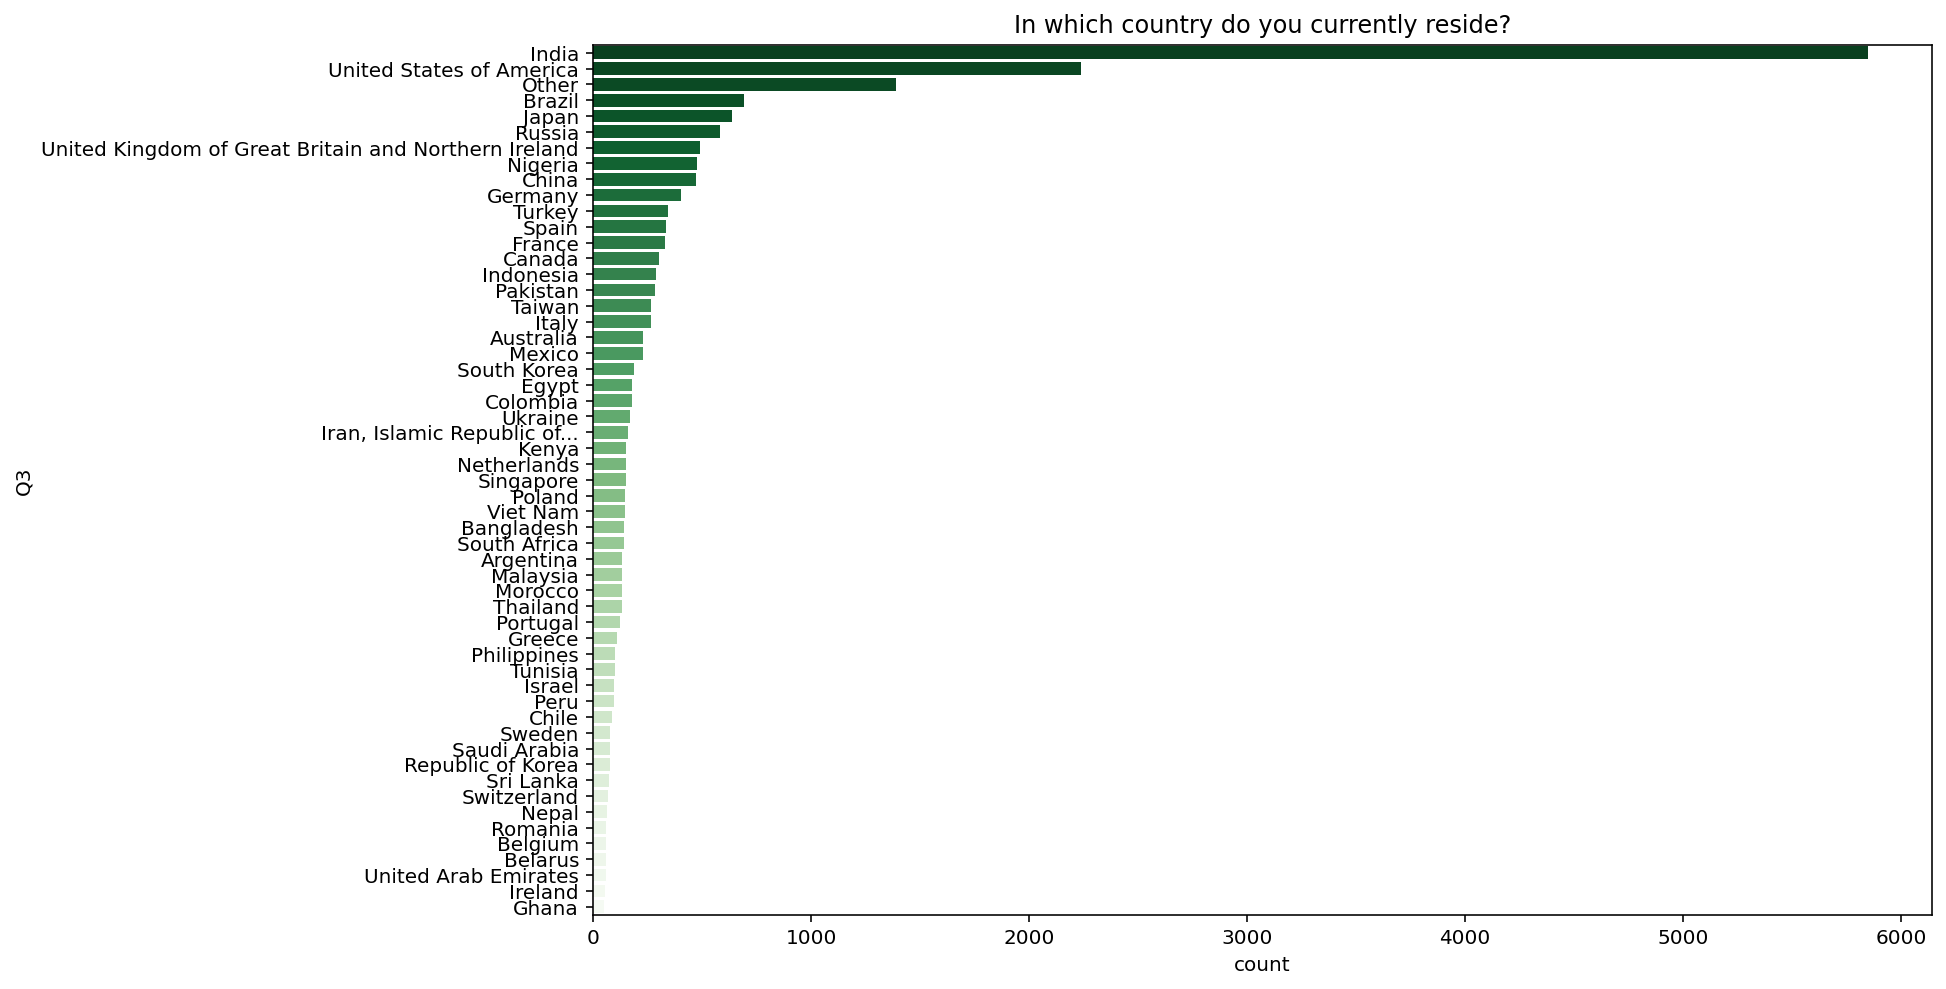

In [ ]:
show_plot_by_qno('Q3')

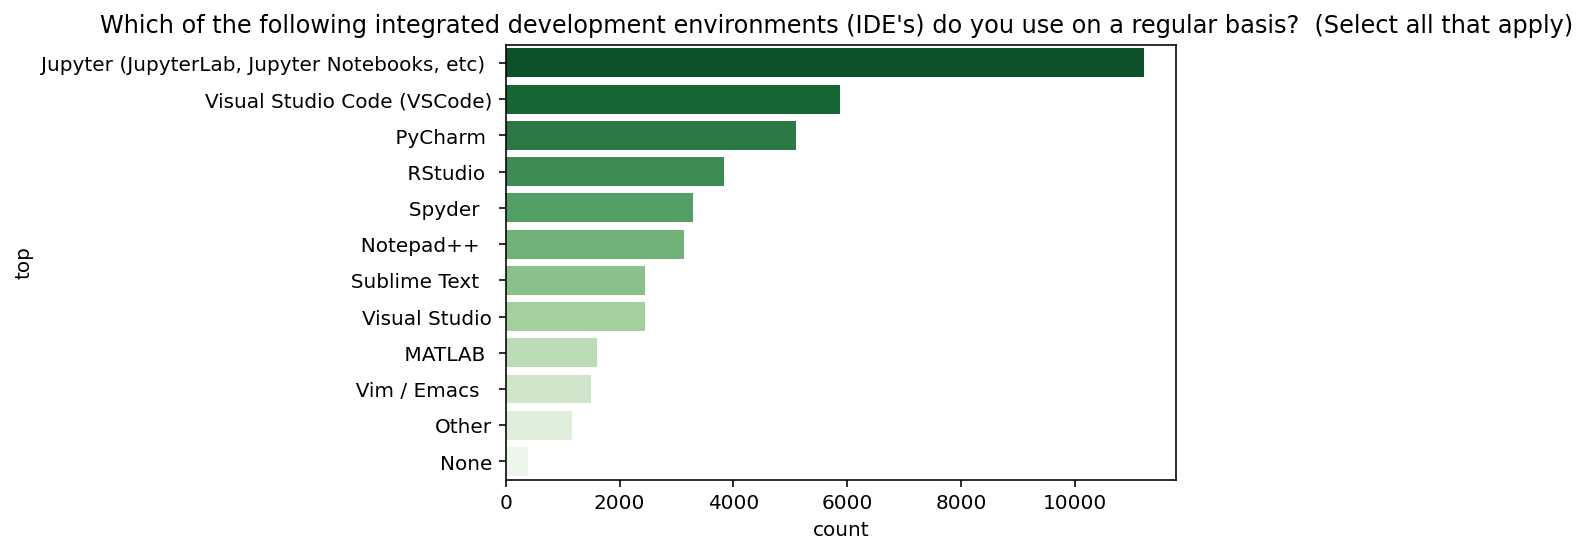

In [ ]:
show_plot_by_qno('Q9')

### Q24 What is your currently yearly compensation (approximate $USD)

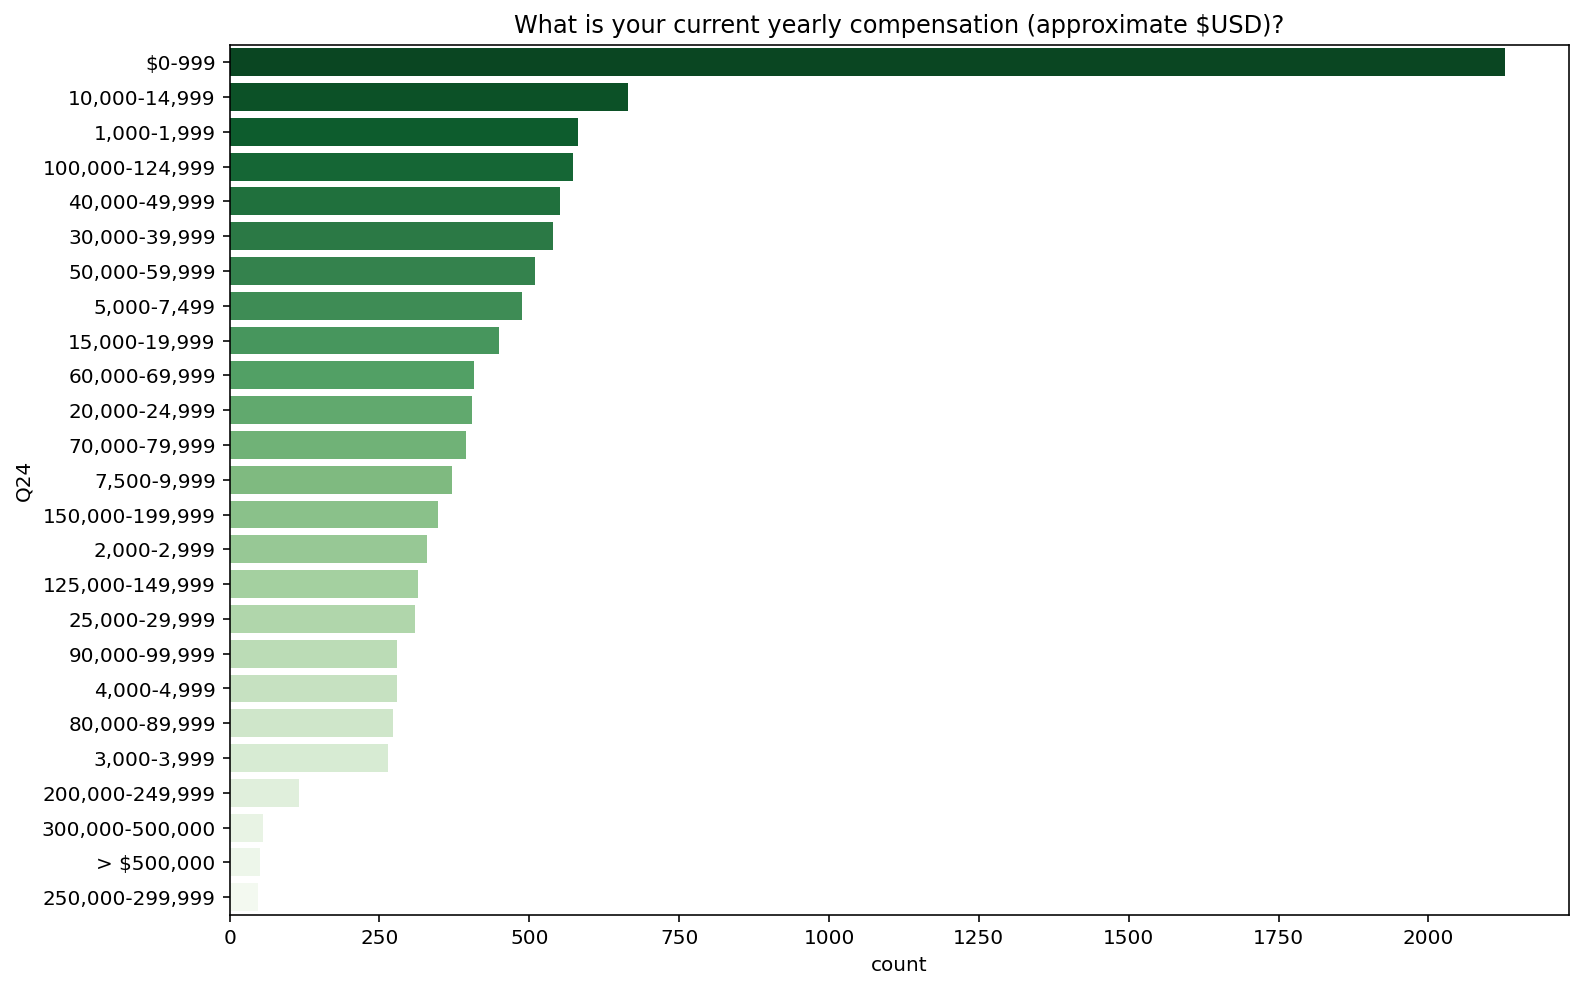

In [ ]:
show_plot_by_qno('Q24')

In [ ]:
# 연봉을 오름차순 또는 내림 차순으로 정렬하고 싶은데 
# 해당 값이 string으로 되어 있고 $ 표현이 섞여 있어서 가공이 필요함

q24_count = answer['Q24'].value_counts().reset_index() # => 0~N으로 인덱스 붙혀줌
q24_count.columns = ['range', 'count']
q24_count

,range,count
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


In [ ]:
q24_count['min'] = q24_count['range'].str.split("-", expand=True)[0]
q24_count['max'] = q24_count['range'].str.split("-", expand=True)[1]
q24_count['min'] = q24_count['min'].str.replace(",|\$|\>", "").astype(int) # type을 int형으로 변경
q24_count = q24_count.sort_values("min")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
q24_count

,range,count,min,max
0,$0-999,2128,0,999
2,"1,000-1,999",581,1000,"1,999"
14,"2,000-2,999",330,2000,"2,999"
20,"3,000-3,999",264,3000,"3,999"
18,"4,000-4,999",279,4000,"4,999"
7,"5,000-7,499",488,5000,"7,499"
12,"7,500-9,999",371,7500,"9,999"
1,"10,000-14,999",665,10000,"14,999"
8,"15,000-19,999",449,15000,"19,999"
10,"20,000-24,999",404,20000,"24,999"


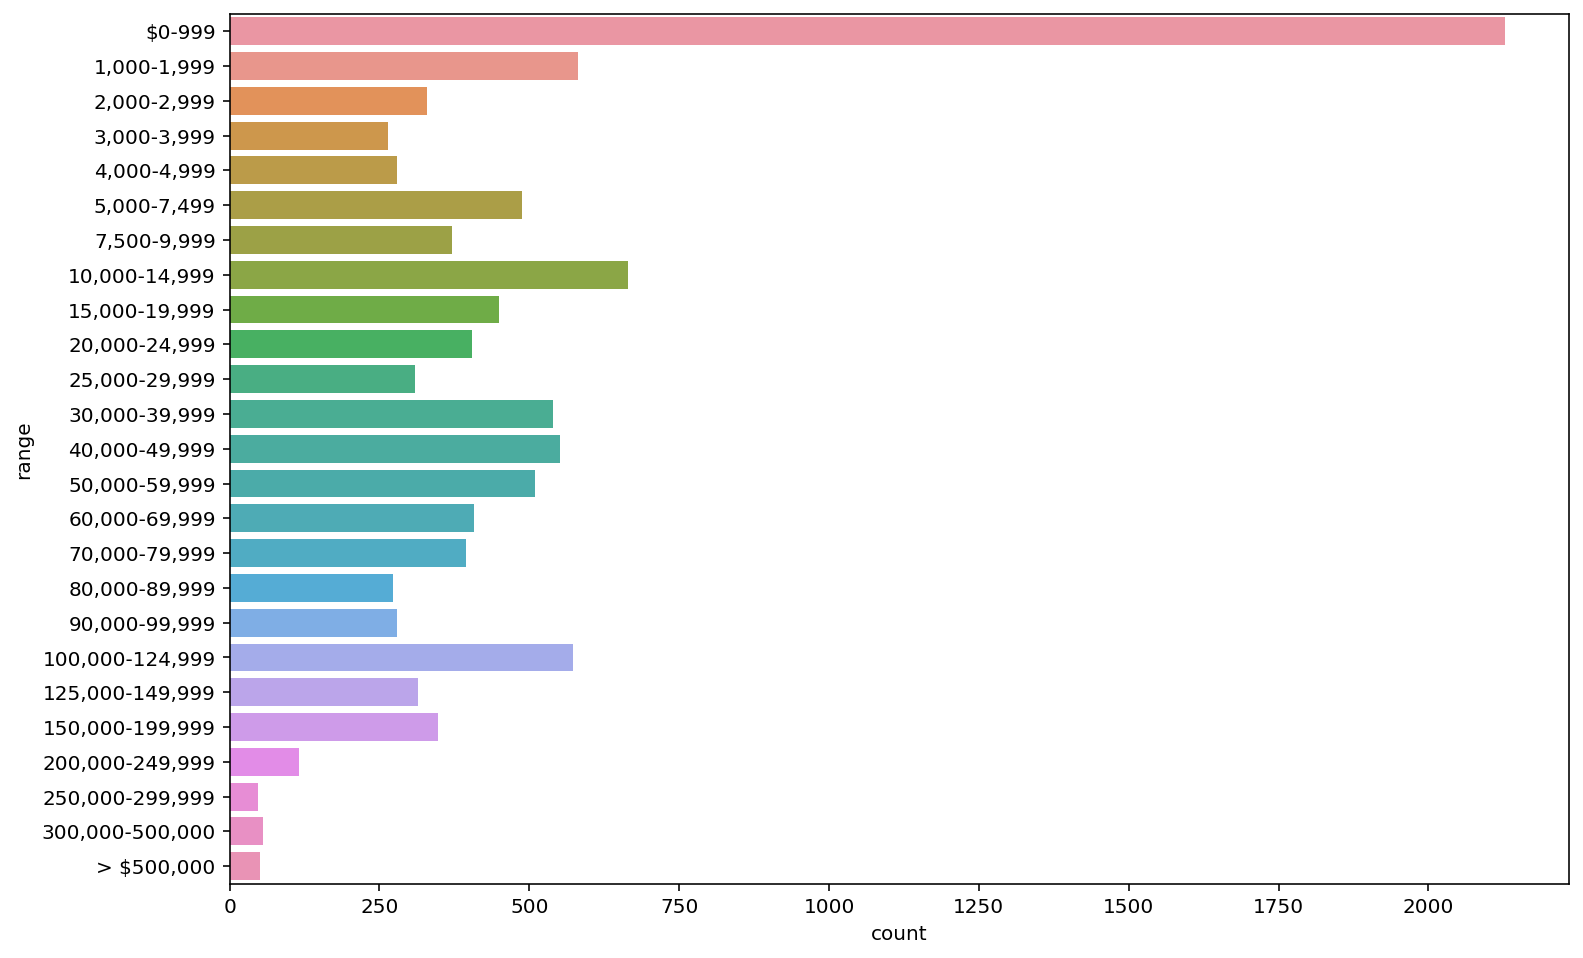

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=q24_count, y='range', x='count')
plt.show()

In [ ]:
q24_cols = q24_count.range.tolist()

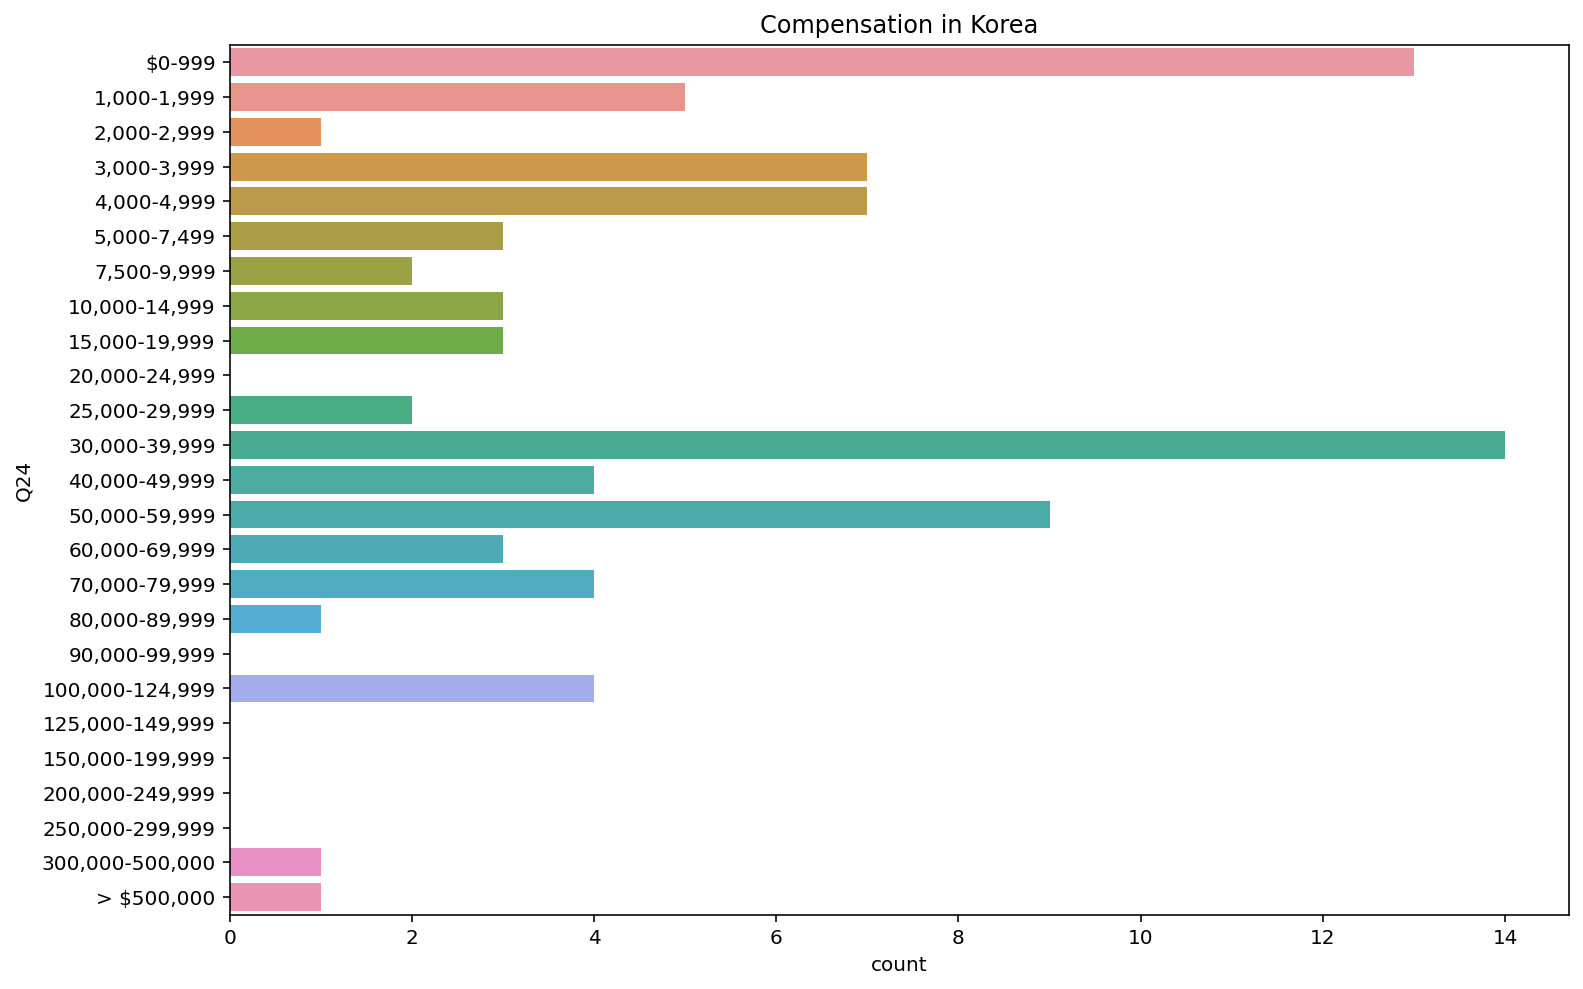

In [ ]:
plt.figure(figsize=(12,8))
q3_kor = answer[answer['Q3'].isin(['South Korea'])]
sns.countplot(data=q3_kor, y='Q24', order=q24_cols).set_title("Compensation in Korea")
plt.show()

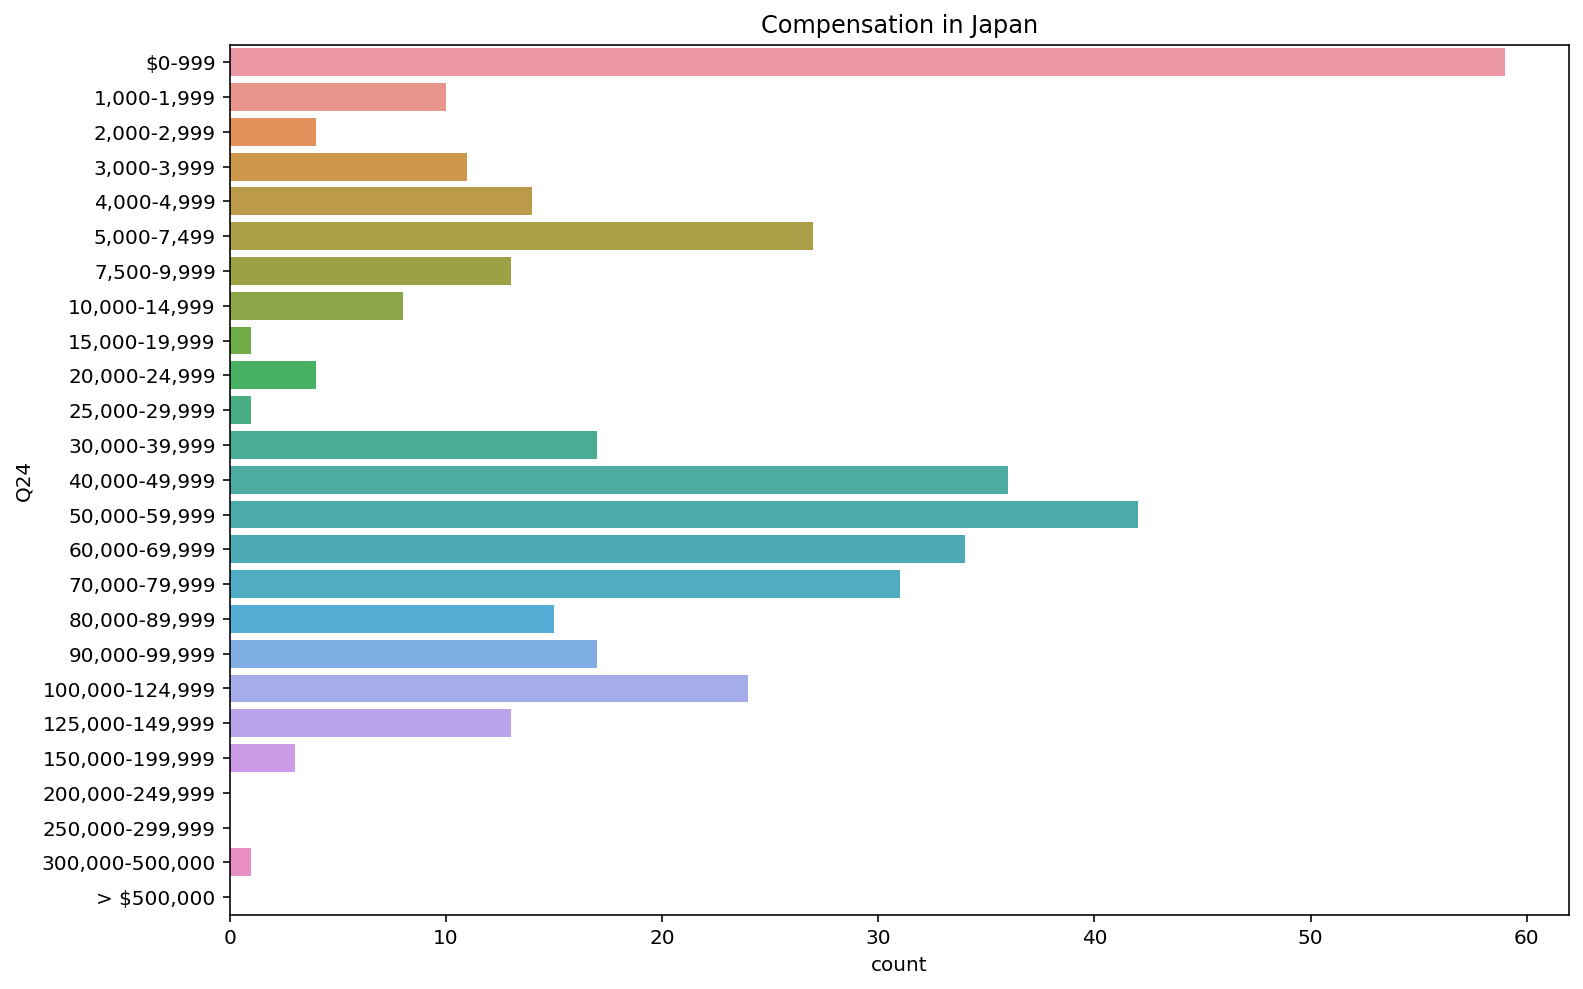

In [ ]:
plt.figure(figsize=(12,8))
q3_jap = answer[answer['Q3'].isin(['Japan'])]
sns.countplot(data=q3_jap, y='Q24', order=q24_cols).set_title("Compensation in Japan")
plt.show()